<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>

<div class="note-box">
    <h2>3. The Wisdom of Crowds: Bagging</h2>
    <p>
        In the last notebook, we saw that a single Decision Tree tends to <strong>overfit</strong>. It learns the "noise" in the data, making it brittle.
    </p>
    <p>
        <strong>The Solution:</strong> Instead of relying on one "expert" (one tree), we ask hundreds of them and average their answers. This is called an <strong>Ensemble</strong>.
    </p>
    <h3>The Bias-Variance Tradeoff</h3>
    <ul>
        <li><strong>High Bias (Underfitting):</strong> The model is too simple (e.g., a straight line for curved data).</li>
        <li><strong>High Variance (Overfitting):</strong> The model is too sensitive. If you change one data point, the whole model changes. Single trees have <em>High Variance</em>.</li>
    </ul>
    <p>
        <strong>Bagging (Bootstrap Aggregating)</strong> reduces variance by creating many trees on different subsets of data and averaging them.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>The Contenders: Random Forest vs. Extra Trees</h2>
    <p>
        We will look at two powerful bagging algorithms.
    </p>
    <h3>1. Random Forest</h3>
    <p>
        This is the industry standard. It creates diversity in two ways:
    </p>
    <ul>
        <li><strong>Bootstrapping:</strong> Each tree is trained on a random sample of the data (with replacement).</li>
        <li><strong>Random Features:</strong> At each split, it only considers a random subset of features (not all of them).</li>
    </ul>

<h3>2. ExtraTrees (Extremely Randomized Trees)</h3>
    <p>
        This is a faster, wilder cousin of the Random Forest.
    </p>
    <ul>
        <li>Instead of looking for the <em>optimal</em> split point for a feature, it chooses a split point <strong>completely at random</strong>.</li>
        <li>Surprisingly, this randomness often yields better results by reducing variance even further!</li>
    </ul>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>1. Setup: Creating Difficult Data</h2>
    <p>
        To truly see the power of Forests, we need a dataset that is hard to separate with straight lines. We will use the <span class="code-inline">make_moons</span> dataset, which creates two swirling moon shapes.
    </p>
</div>

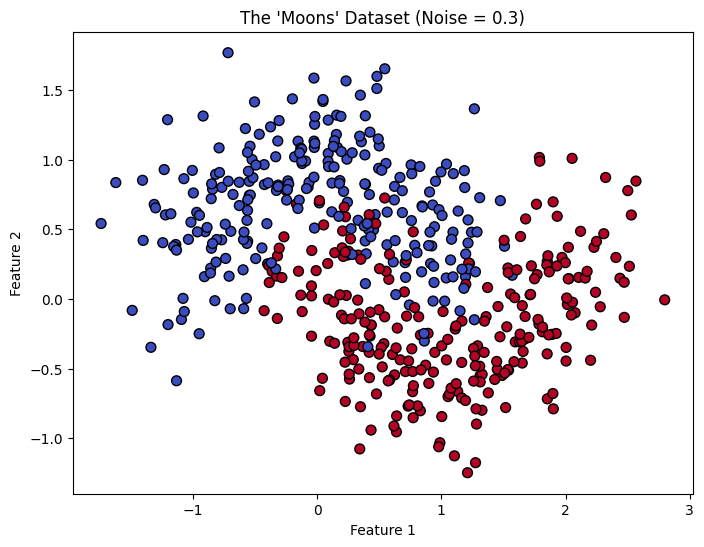

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate "Moon" data (Non-linear)
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title("The 'Moons' Dataset (Noise = 0.3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>2. Visual Showdown: Tree vs. Forest</h2>
    <p>
        Now we will train three models side-by-side:
    </p>
    <ol>
        <li><strong>Decision Tree:</strong> Unconstrained (likely to overfit).</li>
        <li><strong>Random Forest:</strong> An ensemble of 500 trees.</li>
        <li><strong>Extra Trees:</strong> An ensemble of 500 extremely random trees.</li>
    </ol>
    <p>
        We will plot their <strong>Decision Boundaries</strong>. Watch how the single tree makes jagged, sharp cuts (trying to capture every noise point), while the forests create smooth, generalized curves.
    </p>
</div>

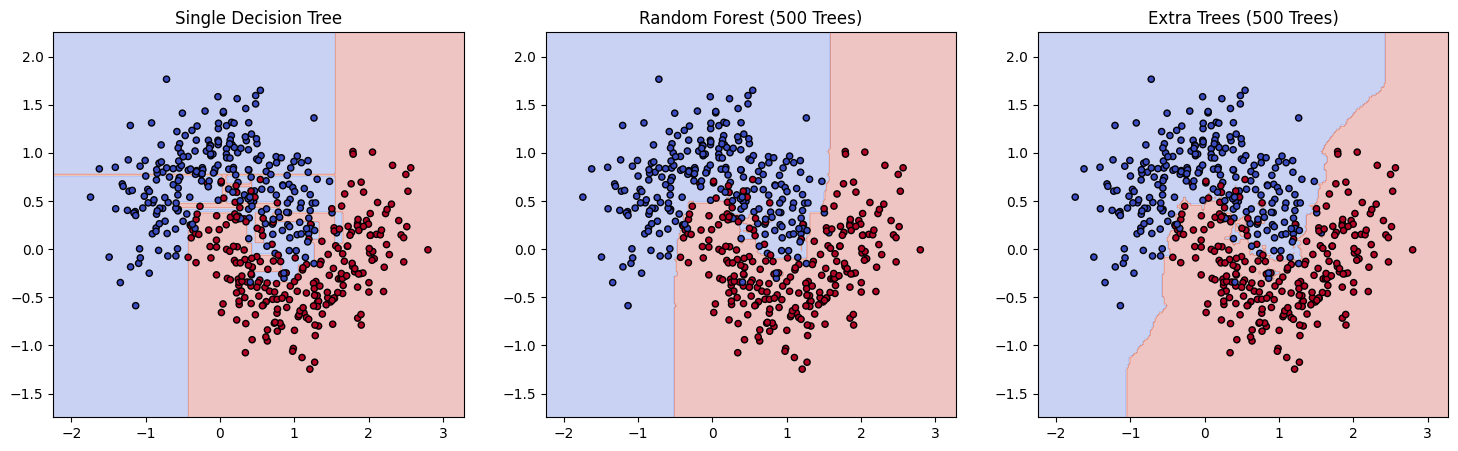

Single Tree Accuracy: 0.8560
Random Forest Accuracy: 0.8880
Extra Trees Accuracy:   0.8880


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from matplotlib.colors import ListedColormap

# 1. Initialize Models
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
et_clf = ExtraTreesClassifier(n_estimators=500, random_state=42, n_jobs=-1)

# 2. Train Models
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)

# --- Helper Function for Plotting ---
def plot_decision_boundary(clf, X, y, title, ax):
    # Create a meshgrid to plot the background colors
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict for every point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contours
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
    ax.set_title(title)

# --- Plotting the Comparison ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Single Tree
plot_decision_boundary(tree_clf, X, y, "Single Decision Tree", axes[0])

# Random Forest
plot_decision_boundary(rf_clf, X, y, "Random Forest (500 Trees)", axes[1])

# Extra Trees
plot_decision_boundary(et_clf, X, y, "Extra Trees (500 Trees)", axes[2])

plt.show()

# Print Accuracies
print(f"Single Tree Accuracy: {tree_clf.score(X_test, y_test):.4f}")
print(f"Random Forest Accuracy: {rf_clf.score(X_test, y_test):.4f}")
print(f"Extra Trees Accuracy:   {et_clf.score(X_test, y_test):.4f}")

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>3. Conclusion: Interpreting the Results</h2>
    <p>
        Let's analyze the results from our experiment above.
    </p>

  <h3>1. The Single Tree (Accuracy: 85.60%)</h3>
    <p>
        Look closely at the first plot. Notice the <strong>sharp, jagged lines</strong>?
    </p>
    <ul>
        <li>The decision boundary looks like a series of rigid boxes or steps.</li>
        <li>It is trying desperately to capture every single noise point (e.g., the isolated blue dots deep in the red territory).</li>
        <li>This is a textbook example of <strong>High Variance (Overfitting)</strong>. If we moved just one or two data points, this shape would change drastically.</li>
    </ul>

  <h3>2. Random Forest (Accuracy: 88.80%)</h3>
    <p>
        The middle plot tells a different story.
    </p>
    <ul>
        <li>The boundary is much <strong>smoother and curved</strong>.</li>
        <li>It ignores the isolated "noise" points that confused the single tree, focusing instead on the overall shape of the two moons.</li>
        <li>By averaging 500 trees, it cancelled out the errors of the individual trees, resulting in a <strong>3.2% jump in accuracy</strong>.</li>
    </ul>

  <h3>3. Extra Trees (Accuracy: 88.80%)</h3>
    <p>
        The third plot is very similar to the Random Forest, achieving the exact same accuracy in this run.
    </p>
    <ul>
        <li>However, if you look closely at the boundary edges, they are often slightly more jagged or "fuzzy" than the Random Forest.</li>
        <li>Because Extra Trees picks split points completely at random, it is <strong>faster to train</strong> computationally. On massive datasets, this speed advantage makes it a very powerful alternative to Random Forest, often with comparable (or identical) accuracy.</li>
    </ul>

  <p>
        <strong>Final Takeaway:</strong> A single tree is easy to interpret but prone to mistakes on complex data. A Forest (Ensemble) loses some interpretability but gains massive stability and accuracy.
    </p>
</div>